In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pytz import timezone
from datetime import datetime

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

datalist = []
for i in range(7):
    datalist.append(pd.read_csv(f"users_combined_info_500_part_{i+1}.csv"))
data = pd.concat(datalist, axis=0)
del datalist
print(data.head())

   user_id    name     location  total_influence        country   event_type  \
0   663432  bdraco  Houston, TX      1776.967163  United States  CreateEvent   
1   663432  bdraco  Houston, TX      1776.967163  United States  CreateEvent   
2   663432  bdraco  Houston, TX      1776.967163  United States  CreateEvent   
3   663432  bdraco  Houston, TX      1776.967163  United States  CreateEvent   
4   663432  bdraco  Houston, TX      1776.967163  United States  CreateEvent   

  event_action                 event_time  
0        added  2024-11-26 20:28:37+08:00  
1        added  2024-11-26 20:42:57+08:00  
2        added  2024-11-27 04:10:46+08:00  
3        added  2024-11-27 17:43:50+08:00  
4        added  2024-11-27 19:56:34+08:00  


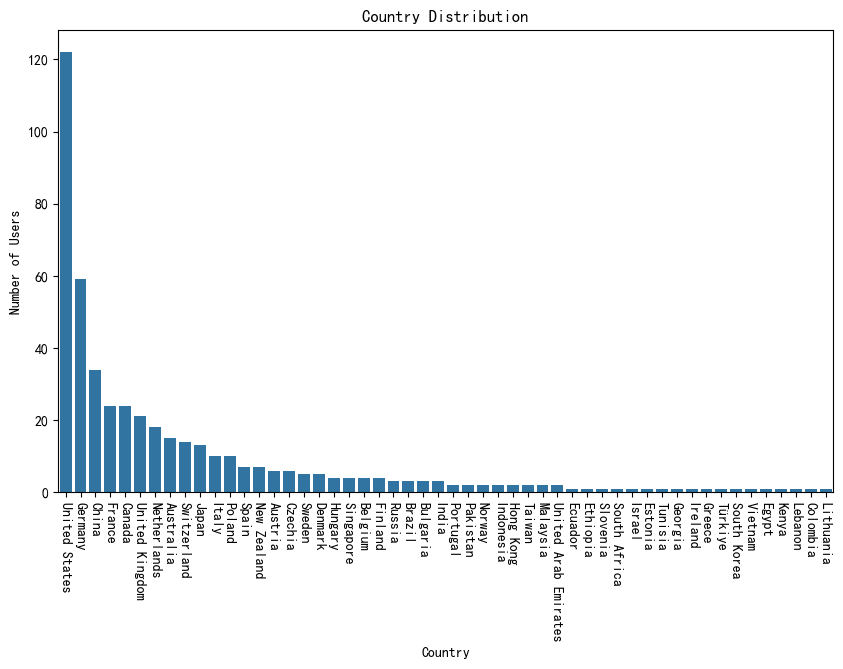

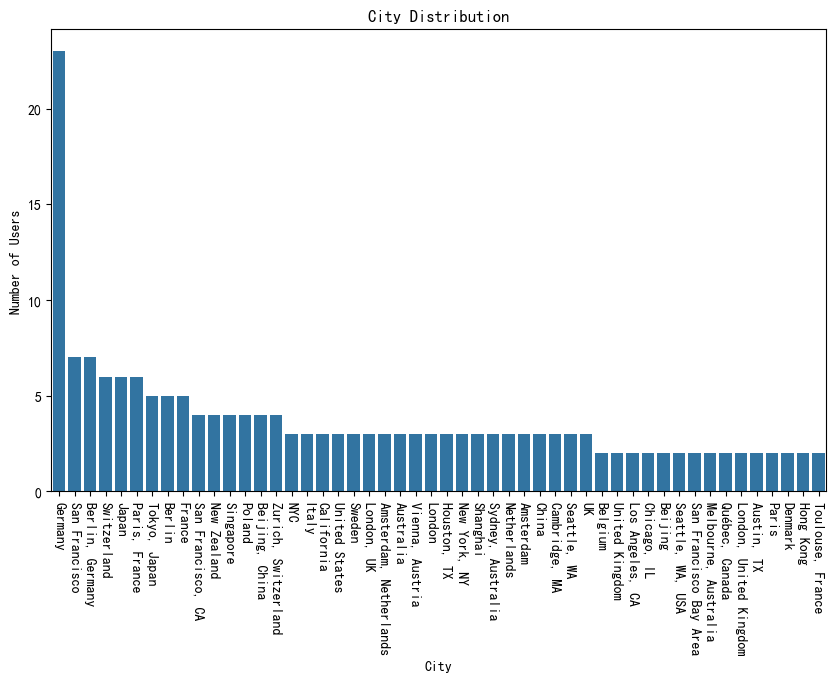

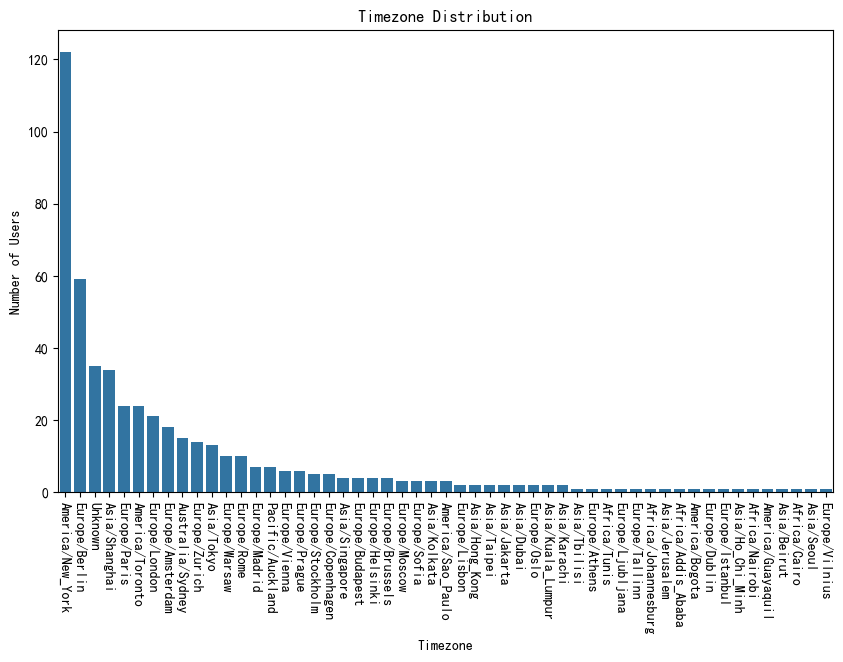

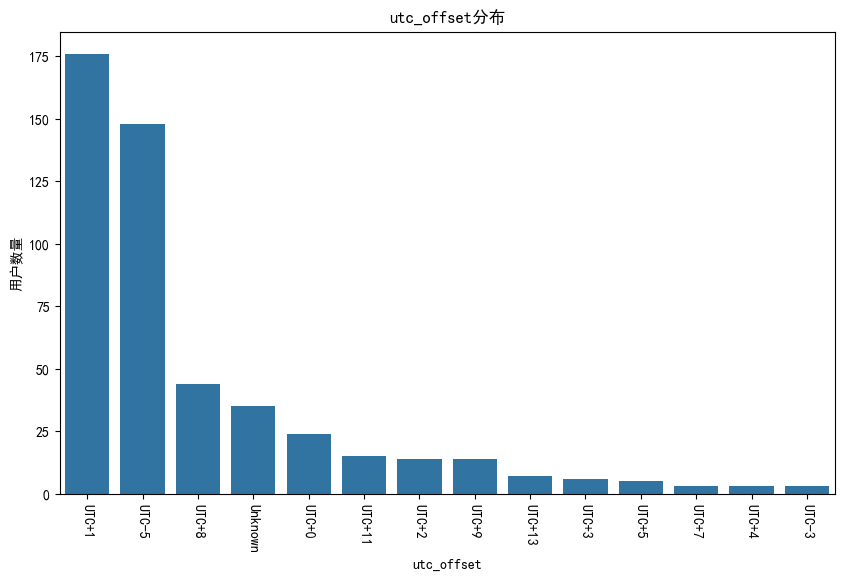

In [55]:
country_to_timezone = {
    'United States': 'America/New_York',
    'Germany': 'Europe/Berlin',
    'China': 'Asia/Shanghai',
    'United Kingdom': 'Europe/London',
    'France': 'Europe/Paris',
    'Canada': 'America/Toronto',
    'Netherlands': 'Europe/Amsterdam',
    'Czechia': 'Europe/Prague',
    'Japan': 'Asia/Tokyo',
    'Switzerland': 'Europe/Zurich',
    'Australia': 'Australia/Sydney',
    'Italy': 'Europe/Rome',
    'Poland': 'Europe/Warsaw',
    'New Zealand': 'Pacific/Auckland',
    'Spain': 'Europe/Madrid',
    'Austria': 'Europe/Vienna',
    'Sweden': 'Europe/Stockholm',
    'Finland': 'Europe/Helsinki',
    'Denmark': 'Europe/Copenhagen',
    'Bulgaria': 'Europe/Sofia',
    'Hungary': 'Europe/Budapest',
    'Belgium': 'Europe/Brussels',
    'Norway': 'Europe/Oslo',
    'India': 'Asia/Kolkata',
    'United Arab Emirates': 'Asia/Dubai',
    'Singapore': 'Asia/Singapore',
    'Brazil': 'America/Sao_Paulo',
    'Hong Kong': 'Asia/Hong_Kong',
    'Malaysia': 'Asia/Kuala_Lumpur',
    'Pakistan': 'Asia/Karachi',
    'Indonesia': 'Asia/Jakarta',
    'Russia': 'Europe/Moscow',
    'Taiwan': 'Asia/Taipei',
    'Tunisia': 'Africa/Tunis',
    'Ethiopia': 'Africa/Addis_Ababa',
    'Colombia': 'America/Bogota',
    'Slovenia': 'Europe/Ljubljana',
    'South Korea': 'Asia/Seoul',
    'Ireland': 'Europe/Dublin',
    'Vietnam': 'Asia/Ho_Chi_Minh',
    'Lebanon': 'Asia/Beirut',
    'Ecuador': 'America/Guayaquil',
    'Greece': 'Europe/Athens',
    'Portugal': 'Europe/Lisbon',
    'Kenya': 'Africa/Nairobi',
    'Egypt': 'Africa/Cairo',
    'Georgia': 'Asia/Tbilisi',
    'Estonia': 'Europe/Tallinn',
    'Lithuania': 'Europe/Vilnius',
    'South Africa': 'Africa/Johannesburg',
    'Türkiye': 'Europe/Istanbul',
    'Israel': 'Asia/Jerusalem'
}

data['timezone'] = data['country'].map(country_to_timezone)
data['timezone'] = data['timezone'].fillna('Unknown')

def get_utc_offset(tz_name):
    if tz_name == 'Unknown':
        return 'Unknown'
    tz = timezone(tz_name)
    now = datetime.now(tz)
    offset = now.utcoffset().total_seconds() / 3600
    return f"UTC{'+' if offset >= 0 else ''}{int(offset)}"

data['utc_offset'] = data['timezone'].apply(get_utc_offset)

data_unique = data.drop_duplicates(subset=['user_id'])
# 国家和地区分布
country_distribution = data_unique['country'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=country_distribution.index, y=country_distribution.values)
plt.title('Country Distribution')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.xticks(rotation=-90)
plt.show()

# 城市级别分布
city_distribution = data_unique['location'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=city_distribution.index[:50], y=city_distribution.values[:50])
plt.title('City Distribution')
plt.xlabel('City')
plt.ylabel('Number of Users')
plt.xticks(rotation=-90)
plt.show()

# 时区分布
timezone_distribution = data_unique['timezone'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=timezone_distribution.index, y=timezone_distribution.values)
plt.title('Timezone Distribution')
plt.xlabel('Timezone')
plt.ylabel('Number of Users')
plt.xticks(rotation=-90)
plt.show()

utc_offset_distribution = data_unique['utc_offset'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=utc_offset_distribution.index, y=utc_offset_distribution.values)
plt.title('utc_offset分布')
plt.xlabel('utc_offset')
plt.ylabel('用户数量')
plt.xticks(rotation=-90)
plt.show()

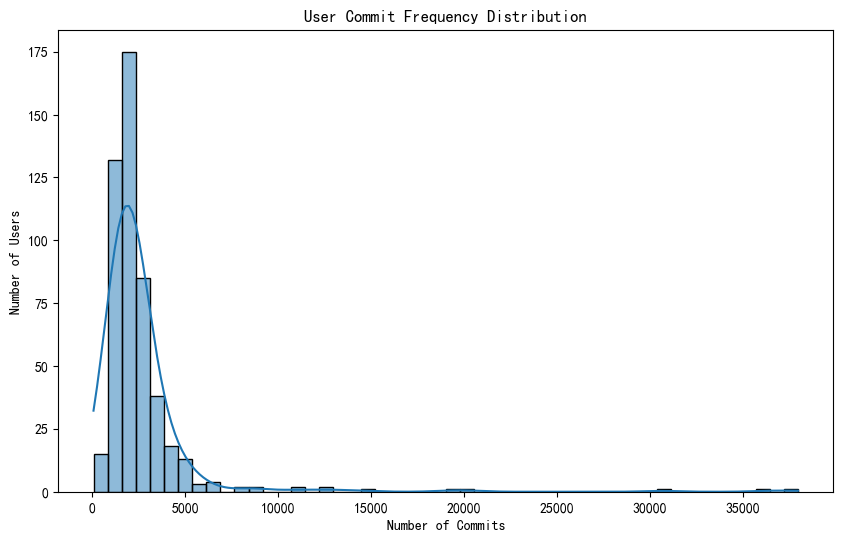

High activity users (top 10%): 50
Low activity users (bottom 10%): 50


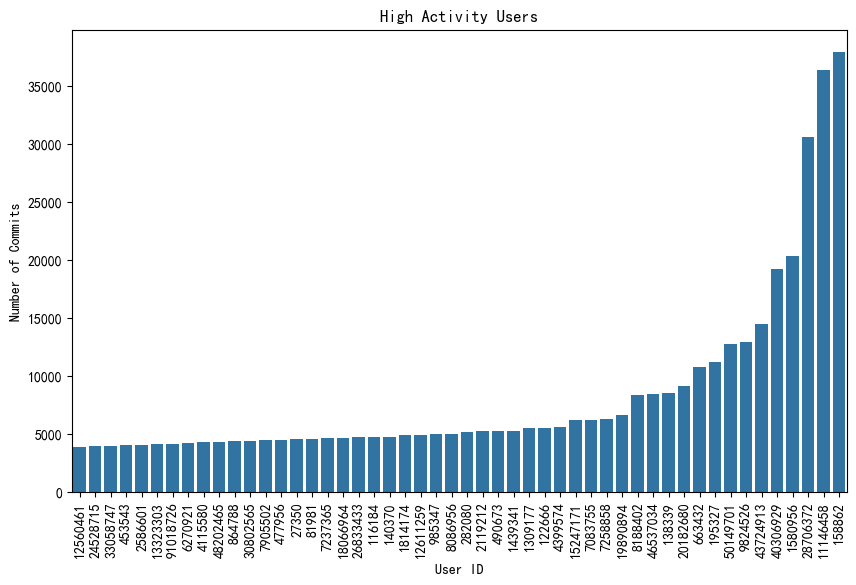

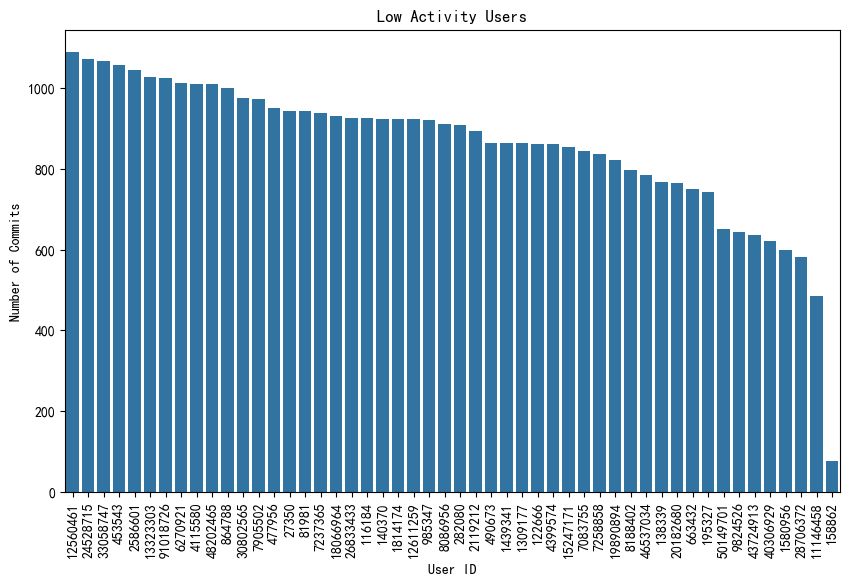

In [62]:
user_commit_counts = data['user_id'].value_counts()

plt.figure(figsize=(10, 6))
sns.histplot(user_commit_counts, bins=50, kde=True)
plt.title('User Commit Frequency Distribution')
plt.xlabel('Number of Commits')
plt.ylabel('Number of Users')
plt.show()

high_activity_threshold = user_commit_counts.quantile(0.9)
low_activity_threshold = user_commit_counts.quantile(0.1)

high_activity_users = user_commit_counts[user_commit_counts >= high_activity_threshold].sort_values(ascending=True)
low_activity_users = user_commit_counts[user_commit_counts <= low_activity_threshold].sort_values(ascending=False)

print(f"High activity users (top 10%): {len(high_activity_users)}")
print(f"Low activity users (bottom 10%): {len(low_activity_users)}")

plt.figure(figsize=(10, 6))
sns.barplot(x=range(len(high_activity_users)), y=high_activity_users.values)
plt.xticks(ticks=range(len(high_activity_users)),labels=high_activity_users.index, rotation=90)
plt.title('High Activity Users')
plt.xlabel('User ID')
plt.ylabel('Number of Commits')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=range(len(low_activity_users)), y=low_activity_users.values)
plt.xticks(ticks=range(len(low_activity_users)),labels=high_activity_users.index, rotation=90)
plt.title('Low Activity Users')
plt.xlabel('User ID')
plt.ylabel('Number of Commits')
plt.xticks(rotation=90)
plt.show()

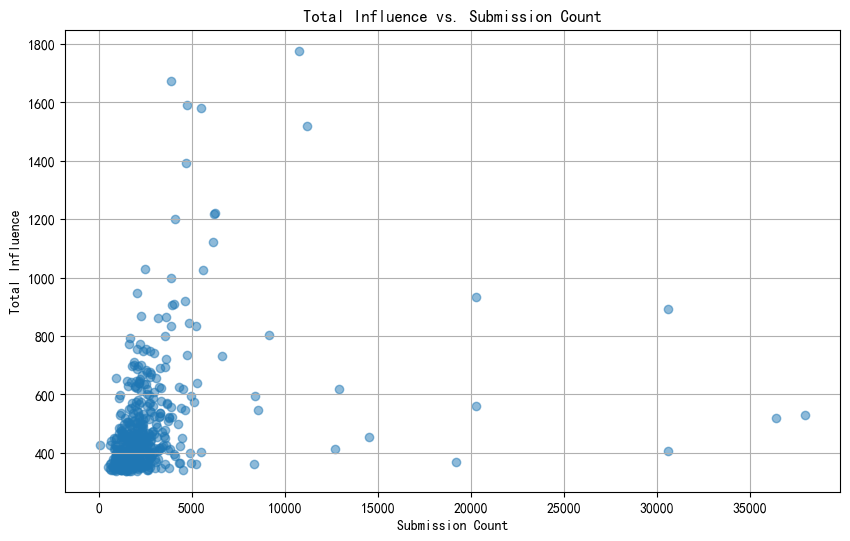

In [50]:
user_submission_counts = data['user_id'].value_counts()

merged_data = data[['user_id', 'total_influence']].drop_duplicates()
merged_data['submission_count'] = merged_data['user_id'].map(user_submission_counts)

plt.figure(figsize=(10, 6))
plt.scatter(merged_data['submission_count'], merged_data['total_influence'], alpha=0.5)
plt.title('Total Influence vs. Submission Count')
plt.xlabel('Submission Count')
plt.ylabel('Total Influence')
plt.grid(True)
plt.show()

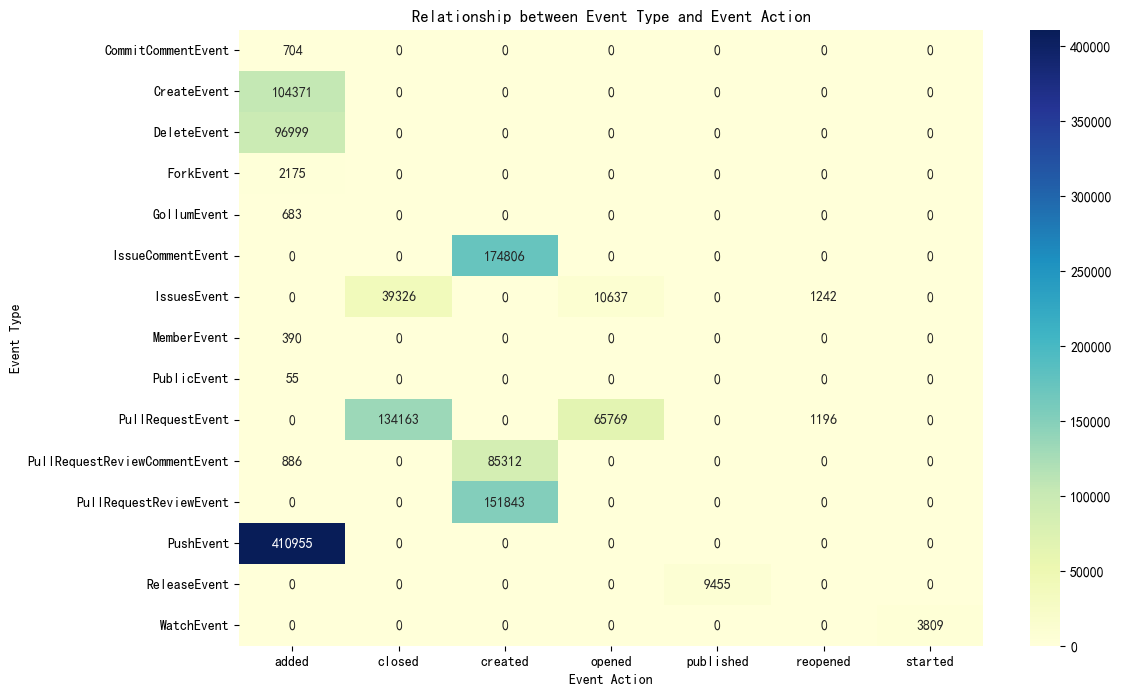

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

event_relationship = pd.crosstab(data['event_type'], data['event_action'])

plt.figure(figsize=(12, 8))
sns.heatmap(event_relationship, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Relationship between Event Type and Event Action')
plt.xlabel('Event Action')
plt.ylabel('Event Type')
plt.show()